In [1]:
# 导入库
import matplotlib.pyplot as plt  
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score  
from sklearn.cluster import KMeans  
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder  

In [2]:
# 基本状态查看
def stats_summary(df):
    '''
    查看数据集的记录数、维度数、前2条数据、描述性统计和数据类型
    :param df: 数据框
    :return: 无
    '''
    print('Data Overview:')
    print('Records: {0}\tDimension：{1}'.format(df.shape[0], df.shape[1]))  # 打印数据形状
    print('-' * 30)
    print('The first two rows:')
    print(df.head(2))    # 输出前2条数据
    print('-' * 30)
    print('Data Desc:')
    print(df.describe())  # 输出数据描述性统计信息
    print('-' * 30)
    print('Data Dtypes:')
    print(df.dtypes)      # 输出数据类型
    print('-' * 30)


# 缺失值查看
def na_summary(df):
    '''
    查看数据集的缺失列、行数量
    :param df: 数据框
    :return: 无
    '''
    na_cols = df.isnull().any(axis=0)    # 判断每一列是否具有缺失值
    print('NA Cols:')
    print(na_cols)  
    print('-' * 30)
    print('Valid records for each cols:') # 查看每一列有效值（非NA）的记录数
    print(df.count())                  
    print('-' * 30)
    print('Total number of NA lines is: {0}'.format(df.isnull().any(axis=1).sum()))  # 查看具有缺失值的行的记录数
    print('-' * 30)

In [3]:
# 读取数据
raw_data = pd.read_table('ad_performance.txt', delimiter='\t')

# 数据审查和校验
stats_summary(raw_data)
na_summary(raw_data)

Data Overview:
Records: 889	Dimension：13
------------------------------
The first two rows:
   渠道代号    日均UV   平均注册率   平均搜索量    访问深度  平均停留时间   订单转化率  投放总时间 素材类型    广告类型  \
0  A203    3.69  0.0071  0.0214  2.3071  419.77  0.0258     20  jpg  banner   
1  A387  178.70  0.0040  0.0324  2.0489  157.94  0.0030     19  jpg  banner   

  合作方式    广告尺寸 广告卖点  
0  roi  140*40   打折  
1  cpc  140*40   满减  
------------------------------
Data Desc:
               日均UV       平均注册率       平均搜索量        访问深度       平均停留时间  \
count    889.000000  889.000000  889.000000  889.000000   887.000000   
mean     540.846772    0.001408    0.030493    2.167166   262.669188   
std     1634.410463    0.003291    0.106199    3.800528   224.364932   
min        0.060000    0.000000    0.000000    1.000000     1.640000   
25%        6.180000    0.000000    0.000600    1.392300   126.020000   
50%      114.180000    0.000000    0.003200    1.793100   236.550000   
75%      466.870000    0.001400    0.011800    2.216200   

In [4]:
# 打印原始数据相关性信息
print('Correlation analysis:')
print(raw_data.corr().round(2).T)               

Correlation analysis:
        日均UV  平均注册率  平均搜索量  访问深度  平均停留时间  订单转化率  投放总时间
日均UV    1.00  -0.05  -0.07 -0.02    0.04  -0.05  -0.04
平均注册率  -0.05   1.00   0.24  0.11    0.22   0.32  -0.01
平均搜索量  -0.07   0.24   1.00  0.06    0.17   0.13  -0.03
访问深度   -0.02   0.11   0.06  1.00    0.72   0.16   0.06
平均停留时间  0.04   0.22   0.17  0.72    1.00   0.25   0.05
订单转化率  -0.05   0.32   0.13  0.16    0.25   1.00  -0.00
投放总时间  -0.04  -0.01  -0.03  0.06    0.05  -0.00   1.00


In [5]:
# 数据预处理

# 删除平均停留时间列，和访问深度列相关性较大
new_data = raw_data.drop(['平均停留时间'], axis=1)

# 字符串分类转整数分类
convert_cols = ['素材类型', '广告类型', '合作方式', '广告尺寸', '广告卖点']
convert_df = new_data.loc[:,convert_cols]  # 获得要转换的数组
model_le = LabelEncoder()
for each_col in convert_cols:        
    convert_df[each_col] = model_le.fit_transform(convert_df[each_col])  
print("After LabelEncoder:")
print(convert_df.head())
print('-' * 30)

# 对数值型标签做OneHotEncode转换
model_ohe = OneHotEncoder(sparse=False)  
ohe_df = model_ohe.fit_transform(convert_df)  
print("After OneHotEncoder:")
print(ohe_df)
print('-' * 30)

# 数据标准化，MinMaxScaler标准化处理
scale_df = new_data.iloc[:, 1:7]  
minmax_scaler = MinMaxScaler()  
data_scaled = minmax_scaler.fit_transform(scale_df)  
print("After MinMaxScaler:")
print(data_scaled.round(2))

After LabelEncoder:
   素材类型  广告类型  合作方式  广告尺寸  广告卖点
0     1     0     3     0     0
1     1     0     0     0     1
2     1     0     0     0     1
3     1     0     0     0     1
4     1     0     0     0     1
------------------------------
After OneHotEncoder:
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]]
------------------------------
After MinMaxScaler:
[[0.   0.18 0.02 0.01 0.12 0.66]
 [0.01 0.1  0.03 0.01 0.01 0.62]
 [0.   0.06 0.05 0.01 0.01 0.1 ]
 ...
 [0.01 0.01 0.   0.   0.   0.72]
 [0.05 0.   0.   0.   0.   0.31]
 [0.   0.   0.   0.53 0.   0.62]]


In [6]:
# 合并所有输入维度
X = np.hstack((data_scaled, ohe_df))

# 通过平均轮廓系数检验得到最佳KMeans聚类模型
score_list = list()  # 用来存储每个K下模型的平均轮廓系数
silhouette_int = -1  # 初始化的平均轮廓系数阙值
for n_clusters in range(2, 6):  # 遍历从2到5几个有限组
    model_kmeans = KMeans(n_clusters=n_clusters)  # 建立聚类模型对象
    cluster_labels = model_kmeans.fit_predict(X)  # 训练聚类模型
    silhouette_tmp = silhouette_score(X, cluster_labels)  # 得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  
        best_k = n_clusters  
        silhouette_int = silhouette_tmp  
        best_kmeans = model_kmeans  
        cluster_labels_k = cluster_labels  
    score_list.append([n_clusters, silhouette_tmp])  # 将每次K及其得分追加到列表
print('K value and silhouette summary:')
print(np.array(score_list))  # 输出所有K下的平均轮廓系数
print('Best K is:{0} with silhouette index of {1}'.format(best_k, silhouette_int.round(4))) # 输出最好的K和平均轮廓系数


K value and silhouette summary:
[[2.         0.38655493]
 [3.         0.45864451]
 [4.         0.50209812]
 [5.         0.4800359 ]]
Best K is:4 with silhouette index of 0.5021


In [7]:
# 输出最好的K聚类结果
cluster_labels = pd.DataFrame(cluster_labels_k, columns=['clusters'])  # 获得训练集下的标签信息
merge_data = pd.concat((raw_data, cluster_labels), axis=1)  # 将原始处理过的数据跟聚类标签整合
merge_data.head()

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点,clusters
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20,jpg,banner,roi,140*40,打折,0
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19,jpg,banner,cpc,140*40,满减,0
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4,jpg,banner,cpc,140*40,满减,0
3,A389,1.09,0.0074,0.3382,4.2426,364.07,0.0153,10,jpg,banner,cpc,140*40,满减,0
4,A390,3.37,0.0028,0.1740,2.1934,313.34,0.0007,30,jpg,banner,cpc,140*40,满减,0


In [8]:
#针对聚类结果的特征分析
clustering_count = pd.DataFrame(merge_data['渠道代号'].groupby(merge_data['clusters']).count()).T.rename(
    {'渠道代号': 'counts'})     # 计算每个聚类类别的样本量
clustering_ratio = (clustering_count / len(merge_data)).round(2).rename(
    {'counts': 'percentage'})  # 计算每个聚类类别的样本量占比

cluster_features = []  # 空列表，用于存储最终合并后的所有特征信息
for line in range(best_k):  # 读取每个类索引
    label_data = merge_data[merge_data['clusters'] == line]  # 获得特定类的数据

    part1_data = label_data.iloc[:, 1:8]  # 获得数值型数据特征
    part1_desc = part1_data.describe().round(3)  # 得到数值型特征的描述性统计信息
    merge_data1 = part1_desc.iloc[2, :]  # 得到数值型特征的均值

    part2_data = label_data.iloc[:, 8:-1]  # 获得字符串型数据特征
    part2_desc = part2_data.describe(include='O')  # 获得字符串型数据特征的描述性统计信息
    merge_data2 = part2_desc.iloc[2, :]  # 获得字符串型数据特征的最频繁值

    merge_line = pd.concat((merge_data1, merge_data2), axis=0)  # 将数值型和字符串型典型特征沿行合并
    cluster_features.append(merge_line)  # 将每个类别下的数据特征追加到列表

cluster_pd = pd.DataFrame(cluster_features).T  # 将列表转化为矩阵
print('Detailed features for all clusters:')
all_cluster = pd.concat((clustering_count, clustering_ratio, cluster_pd),axis=0)  # 将每个聚类类别的所有信息合并
print(all_cluster)

Detailed features for all clusters:
                   0         1        2         3
counts           154       313      349        73
percentage      0.17      0.35     0.39      0.08
日均UV        2717.419  1390.013  933.015  1904.371
平均注册率          0.005     0.003    0.003     0.003
平均搜索量          0.051     0.152    0.064     0.106
访问深度           0.947     1.168    5.916     0.943
平均停留时间       103.103   187.146  285.219   157.336
订单转化率          0.007     0.017    0.006     0.009
投放总时间          8.529     8.199     8.77     8.217
素材类型             jpg       swf      jpg       swf
广告类型          banner       不确定       横幅      tips
合作方式             cpc       roi      cpc       cpm
广告尺寸         308*388    600*90   600*90   450*300
广告卖点              满减        打折       直降        打折


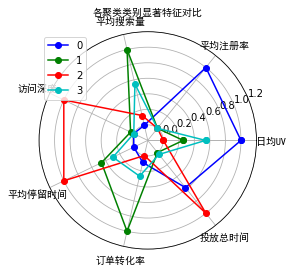

In [9]:
# 各类别显著数值特征对比
num_sets = cluster_pd.iloc[:7, :].T.astype(np.float64)  # 获取要展示的数据
num_sets_scaled = minmax_scaler.fit_transform(num_sets)  # 获得标准化后的数据

fig = plt.figure()  # 建立画布
ax = fig.add_subplot(111, polar=True)  # 增加子网格，注意polar参数
labels = np.array(num_sets.columns)  # 设置要展示的数据标签
cor_list = ['b', 'g', 'r', 'c']  # 定义不同类别的颜色
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)  # 计算各个区间的角度
angles = np.concatenate((angles, [angles[0]]))  # 建立相同首尾字段以便于闭合

for i in range(len(num_sets)):  # 循环每个类别
    data = num_sets_scaled[i, :]  # 获得对应类数据
    data = np.concatenate((data, [data[0]]))  # 建立相同首尾字段以便于闭合
    ax.plot(angles, data, 'o-', c=cor_list[i], label=i)  # 画线

ax.set_thetagrids(angles * 180 / np.pi, labels, fontproperties="SimHei")  # 设置极坐标轴
ax.set_title("各聚类类别显著特征对比", fontproperties="SimHei")  # 设置标题放置
ax.set_rlim(-0.2, 1.2)  # 设置坐标轴尺度范围
plt.legend(loc=0)  # 设置图例位置
plt.show()  # 展示图像